In [14]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt


In [15]:
rate = 0.05
nper = 5
pmt = 0
pv = 120000
price = npf.fv(rate, nper, pmt, -pv)

In [16]:
print(f'Orientacyjna cena mieszkania za 5 lat to: {price:,.2f} PLN')

Orientacyjna cena mieszkania za 5 lat to: 153,153.79 PLN


In [17]:
rate = 0.12
fv = price
nper = 60
pv = 0


In [18]:
print(f'Każdego miesiąca trzeba wpłacać orientacyjnie {npf.pmt(rate/12,nper,pv,-fv):,.2f} PLN')

Każdego miesiąca trzeba wpłacać orientacyjnie 1,875.28 PLN


In [19]:
payment = npf.pmt(rate/12,nper,pv,-fv)
rate = 0.12/12
per = np.arange(1,nper+1,dtype=int)
intrests = - npf.ipmt(rate, per, nper, pv, -fv, when=0)
balance = np.array(intrests+payment)
np.cumsum(balance)


array([  1875.28353879,   3769.31991296,   5682.29665088,   7614.40315618,
         9565.83072653,  11536.77257258,  13527.4238371 ,  15537.98161426,
        17568.64496919,  19619.61495767,  21691.09464603,  23783.28913128,
        25896.40556138,  28030.65315578,  30186.24322613,  32363.38919718,
        34562.30662794,  36783.21323301,  39026.32890413,  41291.87573196,
        43580.07802806,  45891.16234713,  48225.35750939,  50582.89462328,
        52964.0071083 ,  55368.93071817,  57797.90356414,  60251.16613857,
        62728.96133874,  65231.53449092,  67759.13337461,  70312.00824715,
        72890.41186841,  75494.59952588,  78124.82905993,  80781.36088932,
        83464.458037  ,  86174.38615616,  88911.41355651,  91675.81123086,
        94467.85288196,  97287.81494956, 100135.97663785, 103012.61994301,
       105918.02968123, 108852.49351683, 111816.30199079, 114809.74854949,
       117833.12957377, 120886.7444083 , 123970.89539117, 127085.88788387,
       130232.03030149, 1

Text(0, 0.5, 'Wartość w PLN')

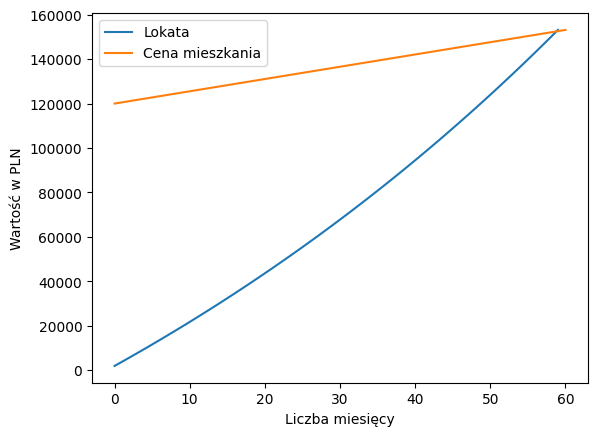

In [20]:
plt.plot(balance.cumsum(), label = 'Lokata')
plt.plot([0, 60], [120000, price], label = "Cena mieszkania")
plt.legend()
plt.xlabel('Liczba miesięcy')
plt.ylabel('Wartość w PLN')
